In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from IPython.display import HTML
from matplotlib import animation

In [33]:
resdir = 'results/dt-var_alp-1.8_t-10.0Myr_e-100_s-80_e0-0.05_m0-10Me_p-100_r-10'

t_tot = 10e6
gpe = 100  
gps = 80    
e0 = 0.05
m0 = 10

N = pd.read_csv('%s/N.csv' %resdir, header=None,index_col=None)
N_i = pd.read_csv('%s/N_i.csv' %resdir, header=None,index_col=None)
N_o = pd.read_csv('%s/N_o.csv' %resdir, header=None,index_col=None)
ts = pd.read_csv('%s/ts.csv' %resdir, header=None,index_col=None)
dt = pd.read_csv('%s/dt.csv' %resdir, header=None,index_col=None)
fu = pd.read_csv('%s/fu.csv' %resdir, header=None,index_col=None)
#nrem_all = pd.read_csv('%s/nrem_coll.csv' %resdir, header=None,index_col=None)
#idx = pd.read_csv('%s/idx.csv' %resdir, header=None,index_col=None).to_numpy()
#esucc_idx = pd.read_csv('%s/e_succ_idx.csv' %resdir, header=None,index_col=None).to_numpy()

steps = len(N)
actual_steps = len(dt)

sMin = -4    
sMax = 8

eMin = 0     
eMax = e0 + 0.05

size = np.linspace(sMin,sMax,gps)
eccs = np.linspace(eMin,eMax,gpe)

rho = 1
mass = np.log10(rho*1*np.pi/3) + 3*size  # log mass in g

asp_rat = (sMax-sMin)/(eMax-eMin)

N = N.to_numpy().reshape(steps,gpe,gps)
N_i = N_i.to_numpy().reshape(steps,gpe,gps)
N_o = N_o.to_numpy().reshape(steps,gpe,gps)
ts = ts.to_numpy()
dt = dt.to_numpy()
fu = fu.to_numpy()

Ndot = 10**N_i - 10**N_o

print(actual_steps)

5236


In [34]:
A_stg = 2e7      # strength constant A in mJ (g m^2 / s^2)
B_stg = 3.3e-8   # strength constant B
s_small = 1   # size_0 of strength eq = 1 cm
alp_stg = -0.3   # strength constant alpha
bet_stg = 2      # strength constant beta

G = 4*np.pi**2
sma = 45                # semimajor axis in au
h = 1                   # disk scale height h = 1 AU
vkep = np.sqrt(G/sma) * (1.5e11/3.15e7)     # keplerian velocity in m s^-1

def qstar(s1):
    term1 = A_stg * (s1/s_small)**alp_stg
    term2 = B_stg * 2.5 * (s1/s_small)**bet_stg
    return term1 + term2
def efault(s):
    """
    - For a given size, defines the minimum e for which a catastrophic collision can occur
    - Assumes both body and bullet have same e
    - If e < efail, 2*Q_star > vcol**2 --> not enough energy to break up
    
    In: s -- float; size, in meters
    Out: efail -- float; min eccentricity
    """
    Q_ = qstar(s)/10000
    efail = np.sqrt(2*Q_)/vkep
    return efail

efail = efault(10**size)

/var/folders/y4/2ycbkc7559gd7v34zsxpc8dh0000gn/T/ipykernel_62579/1376265997.py:10: RuntimeWarning: divide by zero encountered in log10
  i_plot = ax[1].imshow(np.log10( Ndot[-5]),origin='lower',extent=(sMin,sMax,eMin,eMax),
/var/folders/y4/2ycbkc7559gd7v34zsxpc8dh0000gn/T/ipykernel_62579/1376265997.py:10: RuntimeWarning: invalid value encountered in log10
  i_plot = ax[1].imshow(np.log10( Ndot[-5]),origin='lower',extent=(sMin,sMax,eMin,eMax),


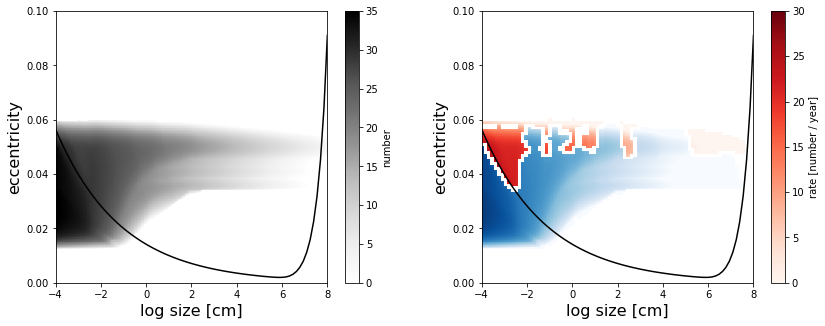

In [35]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
for i in range(2):
    ax[i].set_xlabel('log size [cm]',fontsize=16)
    ax[i].set_ylabel('eccentricity',fontsize=16)
    ax[i].plot(size,efail,c='k')

n_plot = ax[0].imshow(N[-5],origin='lower',extent=(sMin,sMax,eMin,eMax),aspect=asp_rat,vmin=-0,vmax=35,cmap='Greys')
fig.colorbar(n_plot,ax=ax[0],label=r'number')

i_plot = ax[1].imshow(np.log10( Ndot[-5]),origin='lower',extent=(sMin,sMax,eMin,eMax),
                      aspect=asp_rat,vmin=-0,vmax=30,cmap='Blues')
i_plot = ax[1].imshow(np.log10(-Ndot[-5]),origin='lower',extent=(sMin,sMax,eMin,eMax),
                      aspect=asp_rat,vmin=-0,vmax=30,cmap='Reds')
fig.colorbar(i_plot,ax=ax[1],label=r'rate [number / year]')


#ax[0].text(sMax-.5,eMax-.01,'Numbers',fontsize=16,ha='right',va='top')
#ax[1].text(sMax-.5,eMax-.01,'Change',fontsize=16,ha='right',va='top')

#fig.tight_layout()
plt.show()

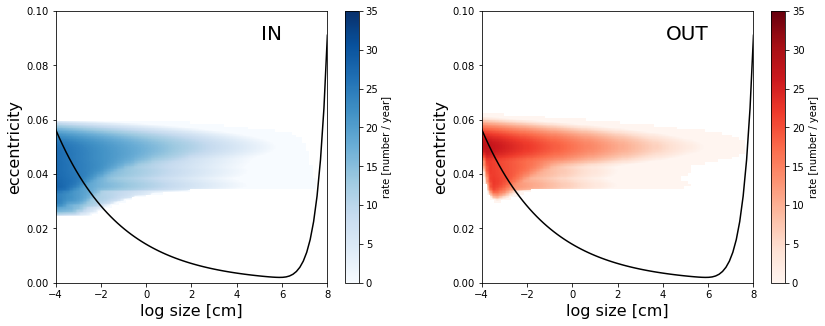

In [36]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
for i in range(2):
    ax[i].set_xlabel('log size [cm]',fontsize=16)
    ax[i].set_ylabel('eccentricity',fontsize=16)
    ax[i].plot(size,efail,c='k')

i_plot = ax[0].imshow(N_i[0],origin='lower',extent=(sMin,sMax,eMin,eMax),
                      aspect=asp_rat,vmin=0,vmax=35,cmap='Blues')
fig.colorbar(i_plot,ax=ax[0],label=r'rate [number / year]')

o_plot = ax[1].imshow(N_o[0],origin='lower',extent=(sMin,sMax,eMin,eMax),
                      aspect=asp_rat,vmin=0,vmax=35,cmap='Reds')
fig.colorbar(o_plot,ax=ax[1],label=r'rate [number / year]')


ax[0].text(sMax-2,eMax-.005,'IN',fontsize=20,ha='right',va='top')
ax[1].text(sMax-2,eMax-.005,'OUT',fontsize=20,ha='right',va='top')
plt.show()
#fig.tight_layout()

In [37]:
frms = np.append(np.zeros(8,dtype='int'),np.logspace(0,np.log10(steps/2),40).astype(int))
frms = np.append(frms,np.logspace(np.log10(steps/2),np.log10(steps-2),40).astype(int))
frms = np.append(frms,np.full(10,steps-2))

#frms = steps - 1

frms = np.append(np.arange(steps-1)[::10],np.full(25,steps-1)).astype(int)

/var/folders/y4/2ycbkc7559gd7v34zsxpc8dh0000gn/T/ipykernel_62579/701777892.py:11: RuntimeWarning: divide by zero encountered in log10
  i_plot = ax[1].imshow(np.log10( Ndot[0]),origin='lower',extent=(sMin,sMax,eMin,eMax),
/var/folders/y4/2ycbkc7559gd7v34zsxpc8dh0000gn/T/ipykernel_62579/701777892.py:11: RuntimeWarning: invalid value encountered in log10
  i_plot = ax[1].imshow(np.log10( Ndot[0]),origin='lower',extent=(sMin,sMax,eMin,eMax),
/var/folders/y4/2ycbkc7559gd7v34zsxpc8dh0000gn/T/ipykernel_62579/701777892.py:27: RuntimeWarning: divide by zero encountered in log10
  i_plot.set_array(np.log10( Ndot[step]))
/var/folders/y4/2ycbkc7559gd7v34zsxpc8dh0000gn/T/ipykernel_62579/701777892.py:27: RuntimeWarning: invalid value encountered in log10
  i_plot.set_array(np.log10( Ndot[step]))


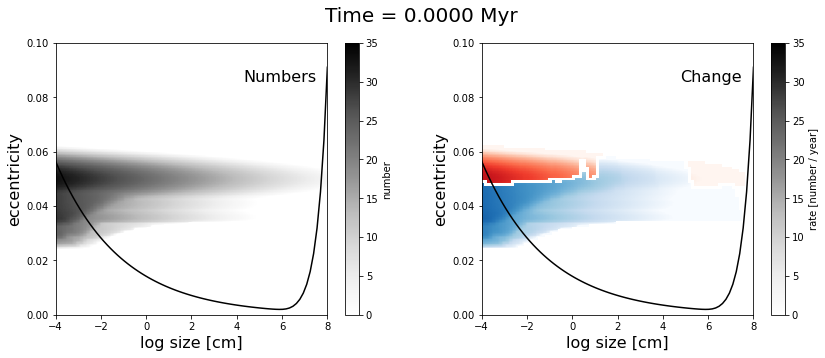

In [22]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
for i in range(2):
    ax[i].set_xlabel('log size [cm]',fontsize=16)
    ax[i].set_ylabel('eccentricity',fontsize=16)

txt_title = fig.suptitle('',fontsize=20)

n_plot = ax[0].imshow(N[0],origin='lower',extent=(sMin,sMax,eMin,eMax),aspect=asp_rat,vmin=-0,vmax=35,cmap='Greys')
fig.colorbar(n_plot,ax=ax[0],label=r'number')

i_plot = ax[1].imshow(np.log10( Ndot[0]),origin='lower',extent=(sMin,sMax,eMin,eMax),
                      aspect=asp_rat,vmin=0,vmax=35,cmap='Blues')
o_plot = ax[1].imshow(np.log10(-Ndot[0]),origin='lower',extent=(sMin,sMax,eMin,eMax),
                      aspect=asp_rat,vmin=0,vmax=35,cmap='Reds')
fig.colorbar(n_plot,ax=ax[1],label=r'rate [number / year]')

ax[0].text(sMax-.5,eMax-.01,'Numbers',fontsize=16,ha='right',va='top')
ax[1].text(sMax-.5,eMax-.01,'Change',fontsize=16,ha='right',va='top')

for i in range(2):
    ax[i].plot(size,efail,c='k')

#fig.tight_layout()

def plot_in_out_rates(step):
    n_plot.set_array(N[step])
    i_plot.set_array(np.log10( Ndot[step]))
    o_plot.set_array(np.log10(-Ndot[step]))
    txt_title.set_text('Time = %.4f Myr' %(ts[step]/1e6))
    return [n_plot,i_plot,o_plot]

anim = animation.FuncAnimation(fig, plot_in_out_rates, frames=frms, interval=100)

HTML(anim.to_html5_video())

In [27]:
"""
fig, ax = plt.subplots(figsize=(5.5,5.5))
ax.set_ylim(eMin,eMax)
ax.set_xlim(sMin,sMax)
ax.set_xlabel('log size [cm]',fontsize=16)
ax.set_ylabel('eccentricity',fontsize=16)

txt_title = ax.set_title('',fontsize=16)

n_ratio_foo = np.log10(-Ndot[0]) - N[0]
p_ratio_foo = np.log10( Ndot[0]) - N[0]

n_underr = np.argwhere(n_ratio_foo > -np.log10(dt[0]))
p_underr = np.argwhere(p_ratio_foo > -np.log10(dt[0]))

neg, = plt.plot(size[n_underr[:,1]],eccs[n_underr[:,0]],ls='',marker='o',markersize=.5,c='r')
pos, = plt.plot(size[p_underr[:,1]],eccs[p_underr[:,0]],ls='',marker='o',markersize=.5,c='b')

ax.plot(size,efail,c='k')

def plot_N_ratio(step):
    p_rat = np.log10( Ndot[step]) - N[step]
    n_rat = np.log10(-Ndot[step]) - N[step]
    
    n_underr = np.argwhere(n_rat > -np.log10(dt[step]))
    p_underr = np.argwhere(p_rat > -np.log10(dt[step]))

    neg.set_xdata(size[n_underr[:,1]])
    neg.set_ydata(eccs[n_underr[:,0]])
    pos.set_xdata(size[p_underr[:,1]])
    pos.set_ydata(eccs[p_underr[:,0]])

    txt_title.set_text('t = %.2f Myr' %(ts[step]/1e6))

N_ratio_anim = animation.FuncAnimation(fig, plot_N_ratio, frames=frms, interval=200)
HTML(N_ratio_anim.to_html5_video())
"""
print()

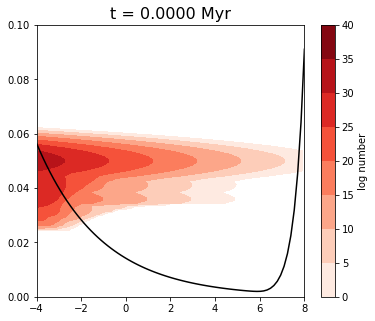

In [24]:
fig, ax = plt.subplots(figsize=(6,5))
ax.set_ylim(eMin,eMax)
ax.set_xlim(sMin,sMax)
ax.set_xlabel('log size [cm]',fontsize=16)
ax.set_ylabel('eccentricity',fontsize=16)
ax.set_xlim(sMin,sMax)
ax.set_ylim(eMin,eMax)

txt_title = ax.set_title('')
#ax.text(-3.6,.145,'Number per bin',fontsize=20,va='top')

im1 = ax.contourf(N[0],origin='lower',extent=(sMin,sMax,eMin,eMax),
                 levels=np.linspace(0,40,9),cmap='Reds')
ax.plot(size,efail,c='k')

plt.colorbar(im1,ax=ax,label='log number')

def plot_flow(step):
    ax.clear()
    ax.contourf(N[step],origin='lower',extent=(sMin,sMax,eMin,eMax),
               levels=np.linspace(0,40,9),cmap='Reds')
    #ax.text(-3.6,.145,'Number per bin',fontsize=20,va='top')
    ax.set_title('t = %.4f Myr' %(ts[step]/1e6),fontsize=16)
    ax.plot(size,efail,c='k')
    plt.xlim(sMin,sMax)
    plt.ylim(eMin,eMax)
    
N_ratio_anim = animation.FuncAnimation(fig, plot_flow, frames=frms, interval=100)
HTML(N_ratio_anim.to_html5_video())

/var/folders/y4/2ycbkc7559gd7v34zsxpc8dh0000gn/T/ipykernel_62579/2635036774.py:12: RuntimeWarning: divide by zero encountered in log10
  im1 = ax.contourf(np.log10(10**(mass + N[0])/5.92e27),origin='lower',extent=(sMin,sMax,eMin,eMax),
/var/folders/y4/2ycbkc7559gd7v34zsxpc8dh0000gn/T/ipykernel_62579/2635036774.py:21: RuntimeWarning: divide by zero encountered in log10
  ax.contourf(np.log10(10**(mass + N[step])/5.92e27),origin='lower',extent=(sMin,sMax,eMin,eMax),


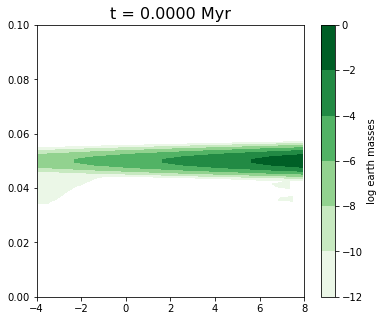

In [28]:
fig, ax = plt.subplots(figsize=(6,5))
ax.set_ylim(eMin,eMax)
ax.set_xlim(sMin,sMax)
ax.set_xlabel('log size [cm]',fontsize=16)
ax.set_ylabel('eccentricity',fontsize=16)
ax.set_xlim(sMin,sMax)
ax.set_ylim(eMin,eMax)

txt_title = ax.set_title('')
#ax.text(-3.6,.145,'Mass per bin',fontsize=20,va='top')

im1 = ax.contourf(np.log10(10**(mass + N[0])/5.92e27),origin='lower',extent=(sMin,sMax,eMin,eMax),
                  levels=[-12,-10,-8,-6,-4,-2,0],cmap='Greens')
#im2 = ax.contour(np.log10(10**(mass + N[0])/5.92e27),origin='lower',extent=(sMin,sMax,eMin,eMax),
#                  levels=[-100,-50,-25],cmap='Greens')

plt.colorbar(im1,ax=ax,label='log earth masses')
ax.plot(size,efail,c='k')
def plot_flow(step):
    ax.clear()
    ax.contourf(np.log10(10**(mass + N[step])/5.92e27),origin='lower',extent=(sMin,sMax,eMin,eMax),
                levels=[-12,-10,-8,-6,-4,-2,0],cmap='Greens',zorder=0)
    #ax.contour(np.log10(10**(mass + N[step])/5.92e27),origin='lower',extent=(sMin,sMax,eMin,eMax),
     #           levels=[-100,-50,-25],cmap='Greens')
    #ax.text(-3.6,.145,'Mass per bin',fontsize=20,va='top')
    ax.set_title('t = %.4f Myr' %(ts[step]/1e6),fontsize=16)
    #ax.plot(size,efail,c='k')
    plt.xlim(sMin,sMax)
    plt.ylim(eMin,eMax)
    
N_ratio_anim = animation.FuncAnimation(fig, plot_flow, frames=frms, interval=100)
HTML(N_ratio_anim.to_html5_video())

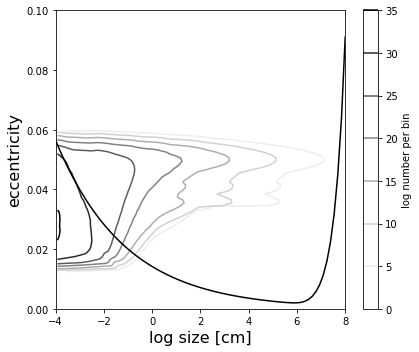

In [29]:
fig, ax = plt.subplots(figsize=(6,5))
ax.set_ylim(eMin,eMax)
ax.set_xlim(sMin,sMax)
ax.set_xlabel('log size [cm]',fontsize=16)
ax.set_ylabel('eccentricity',fontsize=16)
ax.set_xlim(sMin,sMax)
ax.set_ylim(eMin,eMax)

#ax.text(7.6,.145,'t = %f Myr' %(ts[105]/1e6),fontsize=14,ha='right',va='top')
#ax.text(-3.6,.145,'Number / bin',fontsize=20,va='top')

im1 = ax.contour(N[steps-1],origin='lower',extent=(sMin,sMax,eMin,eMax),
           levels=np.linspace(0,35,8),cmap='Greys')

plt.colorbar(im1,ax=ax,label='log number per bin')
ax.plot(size,efail,c='k')

fig.tight_layout()
#fig.savefig('N_1-Myr_contour.png',dpi=300)

# Where is the mass going?

In [38]:
def mass_cdf(numbers):
    """
    In: numbers -- 2D array; number of objects in each bin
    
    Out: cdf_mass -- 2D array; total mass of objects of lower ecc and smaller size than that bin
    """
    
    bin_mass = 10**(mass + numbers)
    cdf_mass = np.zeros_like(numbers)
    
    for i in range(gpe):
        for n in range(gps):
            cdf_mass[i,n] = np.sum( bin_mass[:i+1,:n+1] )

    return cdf_mass

def integrate_mass(sizes,numbers,comp='earth'):
    """
    In: sizes -- array; sizes of each bin, in log cm
        numbers -- array; number of objects in each bin
        comp -- string ['earth','jupiter','pluto']; planet to compare total mass to
        
    Out: mtot -- float; total mass in disk, in earth masses
    """
    mass = (4*np.pi/3) * rho * (10**sizes)**3
    
    dm_ = mass[1:] - mass[:-1]
    mbin = (10**numbers[1:] + 10**numbers[:-1])/2
    
    mtot_g = np.nansum(mbin*dm_)

    if comp == 'earth':
        mtot = mtot_g/5.972e27
    elif comp == 'pluto':
        mtot = mtot_g/1.309e25
    elif comp == 'jupiter':
        mtot = mtot_g/1.899e30
    else:
        print('check your comparison name')
        return
        
    return mtot

### Total mass at each timestep compared to initial

We're gaining?? mass overall

In [39]:
total_mass_ts = np.zeros(steps)
for i in range(steps):
    s_nums_t = np.sum(10**N[i],axis=0)
    total_mass_ts[i] = integrate_mass(size, np.log10(s_nums_t), 'earth')

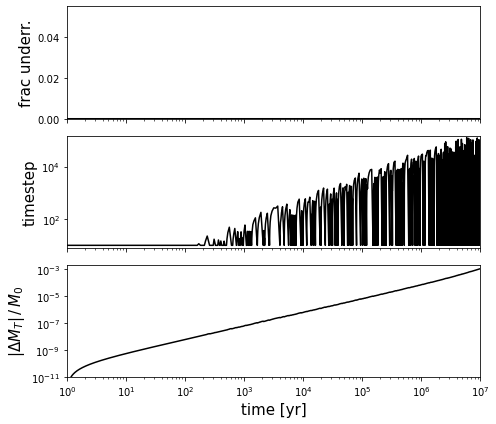

In [43]:
ts_int = np.zeros(len(dt))
for i in range(len(dt)):
    ts_int[i] = np.sum(dt[:i])

fig,ax=plt.subplots(3,figsize=(7,6),sharex=True)

ax[0].plot(ts_int,fu,c='k')
ax[0].set_ylim(0)
ax[0].set_ylabel('frac underr.',fontsize=15)

ax[1].plot(ts_int,dt,ls='-',marker='',markersize=2,c='k')
ax[1].set_ylabel('timestep',fontsize=15)
ax[1].set_ylim(min(dt)-.2*min(dt),max(dt)+.2*max(dt))

#ax[2].plot(ts,ts,ls='-',marker='',markersize=2,c='k')
#ax[2].set_ylabel('time',fontsize=15)
#ax[2].set_ylim(10,max(ts)+.2*max(ts))

#ax[1].plot(frms,np.full(len(frms),80),ls='',marker="|",zorder=0)
#ax[2].plot(frms,np.full(len(frms),2e7),ls='',marker="|",zorder=0)

mass_err = abs(total_mass_ts - total_mass_ts[0]) / total_mass_ts[0]
ax[2].plot(ts, mass_err,ls='-',marker='',markersize=2,c='k')
ax[2].set_ylabel(r'$|\Delta M_T| \,/\,M_{0}$',fontsize=15)
ax[2].set_ylim(1e-11,2*max(mass_err))

for i in range(2):
    ax[i+1].set_yscale('log')

plt.subplots_adjust(hspace=0)
plt.xlim(1,ts[-1] + 20)
plt.xscale('log')
plt.xlabel('time [yr]',fontsize=15)

fig.tight_layout()
plt.show()

### Integrated mass in each size bin

In [44]:
def crit_mass(bin_size,a=45,i=5,rho=1):
    """
    Function to find the critical mass for a given bin to have order unity contribution to overall opacity
    Based on our established scaling relation
    """
    log_m_crit = np.log10(0.003) + np.log10(a/45) + np.log10(i/5) + np.log10(rho/1) + (bin_size + 4) 
    return log_m_crit

total mass / input: 1.147934


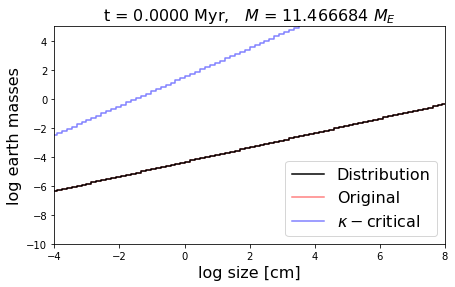

In [50]:
step = steps - 1

s_nums_0 = np.sum(10**N[0],axis=0)
s_nums_t = np.sum(10**N[step],axis=0)

m_sbin_0 = 10**( mass + np.log10(s_nums_0) )
m_sbin_t = 10**( mass + np.log10(s_nums_t) )

m_tot_0 = integrate_mass(size, np.log10(s_nums_0), 'earth')*5.9e27
m_tot_t = integrate_mass(size, np.log10(s_nums_t), 'earth')*5.9e27
print('total mass / input: %1.6f' %(m_tot_t/(5.9e27*m0)))

fig, ax = plt.subplots(figsize=(7,4))

#line1, = plt.step(size,np.log10(m_sbin_t/m_tot_t),c='k',where='mid')
#plt.step(size,np.log10(m_sbin_0/m_tot_0),c='r',alpha=.5,where='mid',zorder=0)
#plt.ylabel('fraction of M',fontsize=16)

line1, = plt.step(size,np.log10(m_sbin_t/5.9e27),c='k',where='mid')
plt.step(size,np.log10(m_sbin_0/5.9e27),c='r',alpha=.5,where='mid',zorder=0)
plt.step(size,crit_mass(size),c='b',alpha=.5,where='mid',zorder=0)

plt.ylabel('log earth masses',fontsize=16)
plt.xlabel('log size [cm]',fontsize=16)

txt_title = plt.title('',fontsize=16)
plt.legend(['Distribution','Original',r'$\kappa-$critical'],fontsize=16,loc='lower right')
plt.xlim(sMin,sMax)
plt.ylim(-10,5)

def plot_binmass(step):
    s_nums_t = np.sum(10**N[step],axis=0)
    m_sbin_t = 10**( mass + np.log10(s_nums_t) )
    m_tot_t = integrate_mass(size, np.log10(s_nums_t), 'earth')*5.9e27

    #line1.set_ydata(np.log10(m_sbin_t/m_tot_t))
    line1.set_ydata(np.log10(m_sbin_t/5.9e27))
    
    txt_title.set_text(r't = %.4f Myr,   $M$ = %.6f $M_E$' %(ts[step]/1e6,m_tot_t/5.9e27))

N_ratio_anim = animation.FuncAnimation(fig, plot_binmass, frames=frms, interval=100)
HTML(N_ratio_anim.to_html5_video())

/var/folders/y4/2ycbkc7559gd7v34zsxpc8dh0000gn/T/ipykernel_62579/2654459004.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.step(eccs,np.log10(m_ebin_0/5.9e27),c='r',alpha=.5,where='mid',zorder=0)
/var/folders/y4/2ycbkc7559gd7v34zsxpc8dh0000gn/T/ipykernel_62579/2654459004.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.step(eccs,np.log10(m_ebin_t/5.9e27),c='k',where='mid',alpha=0.2+.8*i/(len(step)))
/var/folders/y4/2ycbkc7559gd7v34zsxpc8dh0000gn/T/ipykernel_62579/2654459004.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.step(eccs,np.log10(m_ebin_t/5.9e27),c='k',where='mid',alpha=0.2+.8*i/(len(step)))
/var/folders/y4/2ycbkc7559gd7v34zsxpc8dh0000gn/T/ipykernel_62579/2654459004.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.step(eccs,np.log10(m_ebin_t/5.9e27),c='k',where='mid',alpha=0.2+.8*i/(len(step)))


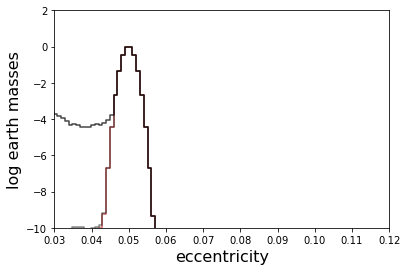

In [47]:
step = [67,105,steps-1]

m_ebin_0 = np.sum(10**(mass + N[0]),axis=1)
m_tot_0 = integrate_mass(size, np.log10(np.sum(10**N[0],axis=0)), 'earth')*5.9e27


fig, ax = plt.subplots(figsize=(6,4))

plt.step(eccs,np.log10(m_ebin_0/5.9e27),c='r',alpha=.5,where='mid',zorder=0)

for i in range(len(step)):
    m_ebin_t = np.sum(10**(mass + N[step[i]]),axis=1)
    plt.step(eccs,np.log10(m_ebin_t/5.9e27),c='k',where='mid',alpha=0.2+.8*i/(len(step)))

plt.ylabel('log earth masses',fontsize=16)
plt.xlabel('eccentricity',fontsize=16)
#plt.legend(['Start',r'$0.01$ Myr',r'$1$ Myr',r'$100$ Myr'],loc='upper left',fontsize=13)

plt.xlim(.03,.12)
plt.ylim(-10,2)
plt.show()
#fig.savefig('m_ecc_bins.png',dpi=300)

### Integrated mass in each eccentricity bin

total mass / input: 1.147934


/var/folders/y4/2ycbkc7559gd7v34zsxpc8dh0000gn/T/ipykernel_62579/543484024.py:16: RuntimeWarning: divide by zero encountered in log10
  line1, = plt.step(eccs,np.log10(m_ebin_t/5.9e27),c='k',where='mid')
/var/folders/y4/2ycbkc7559gd7v34zsxpc8dh0000gn/T/ipykernel_62579/543484024.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.step(eccs,np.log10(m_ebin_0/5.9e27),c='r',alpha=.5,where='mid',zorder=0)
/var/folders/y4/2ycbkc7559gd7v34zsxpc8dh0000gn/T/ipykernel_62579/543484024.py:31: RuntimeWarning: divide by zero encountered in log10
  line1.set_ydata(np.log10(m_ebin_t/5.9e27))


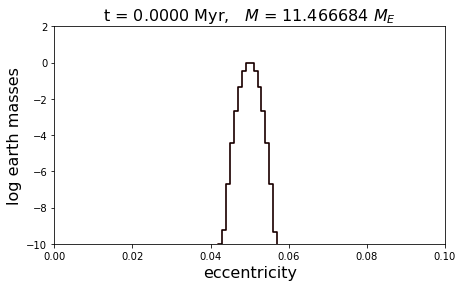

In [51]:
step = steps-1

m_ebin_0 = np.sum(10**(mass + N[0]),axis=1)
m_ebin_t = np.sum(10**(mass + N[step]),axis=1)

m_tot_0 = integrate_mass(size, np.log10(np.sum(10**N[0],axis=0)), 'earth')*5.9e27
m_tot_t = integrate_mass(size, np.log10(np.sum(10**N[step],axis=0)), 'earth')*5.9e27
print('total mass / input: %1.6f' %(m_tot_t/(5.9e27*m0)))

fig, ax = plt.subplots(figsize=(7,4))

#line1, = plt.step(eccs,np.log10(m_ebin_t/m_tot_t),c='k',where='mid')
#plt.step(eccs,np.log10(m_ebin_0/m_tot_0),c='r',alpha=.5,where='mid',zorder=0)
#plt.ylabel('fraction of M',fontsize=16)

line1, = plt.step(eccs,np.log10(m_ebin_t/5.9e27),c='k',where='mid')
plt.step(eccs,np.log10(m_ebin_0/5.9e27),c='r',alpha=.5,where='mid',zorder=0)
plt.ylabel('log earth masses',fontsize=16)

plt.xlabel('eccentricity',fontsize=16)
txt_tot_m = plt.text(0.005,-3,'',fontsize=13)
txt_title = plt.title('',fontsize=16)
plt.xlim(eMin,eMax)
plt.ylim(-10,2)

def plot_binmass(step):
    m_ebin_t = np.sum(10**(mass + N[step]),axis=1)
    m_tot_t = integrate_mass(size, np.log10(np.sum(10**N[step],axis=0)), 'earth')*5.9e27

    #line1.set_ydata(np.log10(m_ebin_t/m_tot_t))
    line1.set_ydata(np.log10(m_ebin_t/5.9e27))
    
    txt_title.set_text(r't = %.4f Myr,   $M$ = %.6f $M_E$' %(ts[step]/1e6,m_tot_t/5.9e27))

N_ratio_anim = animation.FuncAnimation(fig, plot_binmass, frames=frms, interval=100)
HTML(N_ratio_anim.to_html5_video())

### Number of particles in each size bin, at a given ecc. slice

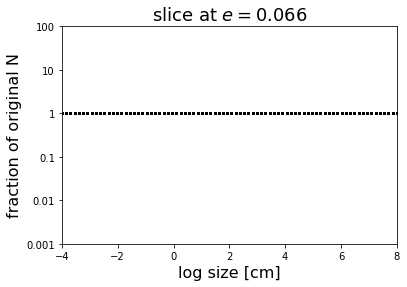

In [52]:
ecc_foo = 65
#ecc_foo = 338

for i in np.linspace(0,steps-1,100,dtype='int'):
    plt.scatter(size,N[i,ecc_foo,:] - N[0,ecc_foo,:],c='k',alpha=i/(10*steps)+.1,s=2)

plt.xlim(-4,8)
plt.ylim(-3,2)
plt.ylabel('fraction of original N',fontsize=16)
plt.xlabel('log size [cm]',fontsize=16)
plt.yticks([-3,-2,-1,0,1,2],labels=['0.001','0.01','0.1','1','10','100'])
plt.title(r'slice at $e = $%1.3f' %eccs[ecc_foo],fontsize=18)
#plt.savefig('frac_evo_e-0.1.png',dpi=300)
plt.show()

### Opacity at each timestep

In [53]:
def opacity(numbers=N, step='all'):
    """
    calculate opacity at a certain step of an evolution of our numbers array
    
    In: numbers -- ts-by-gpe-by-gps array; 3D array with numbers in each 2D bin at each timestep
        step -- 'all' or int; either all the timesteps or a particular one
        
    Out: opacity -- float or array; opacity at selected timesteps
    """
    if step == 'all':
        opacity = np.zeros(len(numbers))
        for t in range(len(numbers)):
            N_sizes = np.nansum(10**numbers[t],axis=0)
            N_scale = N_sizes*10**(size*2) / (2*sma*h*(1.496e13)**2)
            opacity[t] = np.nansum(N_scale)
    else:
        N_sizes = np.nansum(10**numbers[step],axis=0)
        N_scale = N_sizes*10**(size*2) / (2*sma*h*(1.496e13)**2)
        opacity = np.nansum(N_scale)
        
    return opacity

### Binned mass evolution

How does the total mass in four size bins evolve over time?

In [54]:
def mass_size_bins(numbers=N,bins=4,step='all'):
    
    bin_edges = np.linspace(0,(N.shape)[2],bins+1,dtype=int)
    if step == 'all':
        bin_mass = np.zeros((bins,len(numbers)))
        for t in range(len(numbers)):
            N_sizes = np.nansum(10**numbers[t],axis=0)
            M_sizes = N_sizes * (4*np.pi/3) * 10**(size*3)
            for i in range(bins):
                lo = bin_edges[i]
                hi = bin_edges[i+1]
                bin_mass[i,t] = np.nansum(M_sizes[lo:hi])
    return bin_mass       

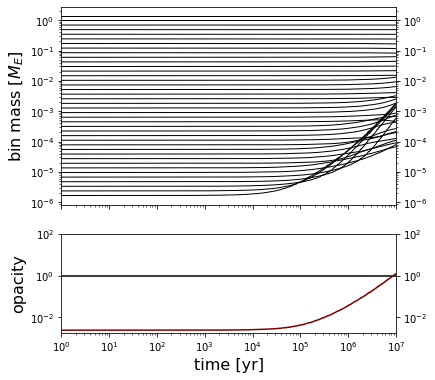

In [55]:
fig,ax = plt.subplots(2,figsize=(6,6),sharex=True,gridspec_kw={'height_ratios': [2, 1]})
ax[0].plot(np.logspace(0,np.log10(ts[-1]),steps),(mass_size_bins(bins=80)/5.96e27)[::2].T, c='k',lw=1)
ax[0].set_xlim(1e-5,ts[-1]/1e6)
#ax[0].legend([r'$\mu$m$-$mm', r'mm$-$m',r'm$-$km',r'km$+$'])
ax[0].set_ylabel(r'bin mass [$M_E$]',fontsize=16)
    
h=3
ax[1].plot(np.logspace(0,np.log10(ts[-1]),steps),opacity(),c='maroon')
ax[1].hlines(1,1e-6,1e10,color='k',zorder=0)
ax[1].set_xlim(1,ts[-1])
ax[1].set_ylabel('opacity',fontsize=16)
ax[1].set_xlabel('time [yr]',fontsize=16)

for i in range(2):
    ax[i].tick_params('y',which='both',right=True,labelright=True)
    ax[i].set_yscale('log')
    ax[i].set_xscale('log')

ax[1].set_yticks([.01,1,100])

plt.show()
#fig.savefig('mass_opacity_evo.png',dpi=300)